In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3


import warnings
warnings.filterwarnings("ignore")

In [6]:
train_path = "E:\\Lung Cancer\\chest_xray\\train"
val_path = "E:\\Lung Cancer\\chest_xray\\val"
test_path = "E:\\Lung Cancer\\chest_xray\\test"

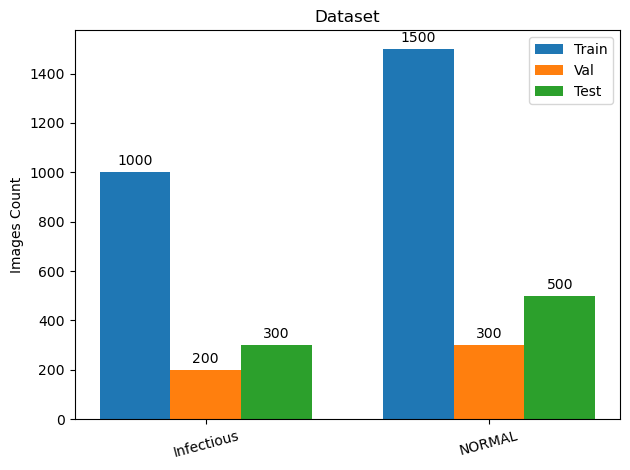

In [7]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['Infectious', 'NORMAL']
train_list = [1000, 1500]  
val_list = [200, 300]      
test_list = [300, 500]     

x = np.arange(len(labels))  
width = 0.25  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_list, width, label='Train')
rects2 = ax.bar(x, val_list, width, label='Val')
rects3 = ax.bar(x + width, test_list, width, label='Test')

ax.set_ylabel('Images Count')
ax.set_title('Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=15)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (224, 224)  
BATCH_SIZE = 32 

train_dir = train_path
validation_dir = val_path
test_dir=test_path

train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=20,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,  
    zoom_range=0.2, 
    horizontal_flip=True,
    fill_mode='nearest' 
)

validation_datagen = ImageDataGenerator(rescale=1./255)  
testing_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, 
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2,  
    horizontal_flip=True, 
    fill_mode='nearest'  
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  
)


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  
)

testing_generator=testing_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Found 5216 images belonging to 2 classes.


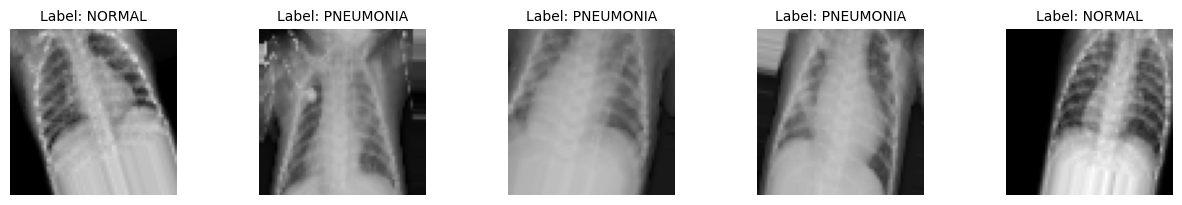

In [9]:
def plot_sample_images(images, labels, class_indices):
    class_labels = list(class_indices.keys())
    fig, axs = plt.subplots(1, len(images), figsize=(15, 5))  
    fig.subplots_adjust(wspace=0.5)  

    for i in range(len(images)):
        axs[i].imshow(images[i])
        axs[i].set_title("Label: {}".format(class_labels[np.argmax(labels[i])]), fontsize=10)  
        axs[i].axis('off')

    plt.show()

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=5,  
    class_mode='categorical',  
    shuffle=True
)

sample_images, sample_labels = next(train_generator)
plot_sample_images(sample_images, sample_labels, train_generator.class_indices)


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "E:\\Lung Cancer\\chest_xray\\train"
val_path = "E:\\Lung Cancer\\chest_xray\\val"
test_path = "E:\\Lung Cancer\\chest_xray\\test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224), 
    batch_size=32,
    class_mode='binary'
)

validation_set = test_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg16_model.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=10,
    validation_data=validation_set,
    validation_steps=len(validation_set)
)
test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

evaluation = model.evaluate(test_set, steps=len(test_set))
print("Test Accuracy:", evaluation[1])

model.save("lung_cancer_detection_vgg16_model.h5")


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 799s 5s/step - loss: 0.3477 - accuracy: 0.8990 - val_loss: 0.3079 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 760s 5s/step - loss: 0.1471 - accuracy: 0.9448 - val_loss: 0.3810 - val_accuracy: 0.7500
Epoch 3/10
163/163 [==============================] - 791s 5s/step - loss: 0.1424 - accuracy: 0.9467 - val_loss: 0.2886 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 789s 5s/step - loss: 0.1353 - accuracy: 0.9454 - val_loss: 0.5896 - val_accuracy: 0.6875
Epoch 5/10
163/163 [==============================] - 792s 5s/step - loss: 0.1326 - accuracy: 0.9538 - val_loss: 0.3051 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 750s 5s/step - loss: 0.1278 - accuracy: 0.9517 - val_loss: 0.2125 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 758s 5

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "E:\\Lung Cancer\\chest_xray\\train"
val_path = "E:\\Lung Cancer\\chest_xray\\val"
test_path = "E:\\Lung Cancer\\chest_xray\\test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(299, 299), 
    batch_size=32,
    class_mode='binary'
)

validation_set = test_datagen.flow_from_directory(
    val_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=10,
    validation_data=validation_set,
    validation_steps=len(validation_set)
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

evaluation = model.evaluate(test_set, steps=len(test_set))
print("Test Accuracy:", evaluation[1])

model.save("lung_cancer_detection_inceptionv3_model.h5")


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 2532s 15s/step - loss: 0.1580 - accuracy: 0.9383 - val_loss: 26.3496 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 3218s 20s/step - loss: 0.1167 - accuracy: 0.9555 - val_loss: 0.8021 - val_accuracy: 0.8125
Epoch 3/10
163/163 [==============================] - 3257s 20s/step - loss: 0.0921 - accuracy: 0.9676 - val_loss: 1.7098 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 3215s 20s/step - loss: 0.0752 - accuracy: 0.9741 - val_loss: 0.6237 - val_accuracy: 0.6875
Epoch 5/10
163/163 [==============================] - 3191s 20s/step - loss: 0.0675 - accuracy: 0.9747 - val_loss: 0.2041 - val_accuracy: 0.9375
Epoch 6/10
163/163 [==============================] - 3188s 20s/step - loss: 0.0732 - accuracy: 0.9745 - val_loss: 1.0825 - val_accuracy: 0.7500
Epoch 7/10
163/163 [===========================

C:\Users\parkh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "E:\\Lung Cancer\\chest_xray\\train"
val_path = "E:\\Lung Cancer\\chest_xray\\val"
test_path = "E:\\Lung Cancer\\chest_xray\\test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_set = test_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=10,
    validation_data=validation_set,
    validation_steps=len(validation_set)
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

evaluation = model.evaluate(test_set, steps=len(test_set))
print("Test Accuracy:", evaluation[1])

model.save("lung_cancer_detection_efficientnetb0_model.h5")


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
16705208/16705208 [==============================] - 13s 1us/step
Epoch 1/10
163/163 [==============================] - 1096s 7s/step - loss: 0.1487 - accuracy: 0.9444 - val_loss: 6.3262 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 1580s 10s/step - loss: 0.0965 - accuracy: 0.9651 - val_loss: 5.9066 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 1539s 9s/step - loss: 0.0839 - accuracy: 0.9689 - val_loss: 2.7334 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 1208s 7s/step - loss: 0.0611 - accuracy: 0.9781 - val_loss: 5.9973 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 975s 6s/step - loss: 0.0502 - accuracy: 0.9808 - val_loss: 2.3126 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 969s 6s/step - loss: 0.0523 - accuracy: 0.9810 - val_loss: 3.3387 - val_accura

C:\Users\parkh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "E:\\Lung Cancer\\chest_xray\\train"
val_path = "E:\\Lung Cancer\\chest_xray\\val"
test_path = "E:\\Lung Cancer\\chest_xray\\test"


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

validation_set = test_datagen.flow_from_directory(
    val_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=25,
    validation_data=validation_set,
    validation_steps=len(validation_set)
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

evaluation = model.evaluate(test_set, steps=len(test_set))
print("Test Accuracy:", evaluation[1])

model.save("lung_cancer_detection_model.h5")


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/25
163/163 [==============================] - 160s 964ms/step - loss: 0.4317 - accuracy: 0.8020 - val_loss: 0.5099 - val_accuracy: 0.7500
Epoch 2/25
163/163 [==============================] - 175s 1s/step - loss: 0.2783 - accuracy: 0.8771 - val_loss: 0.5376 - val_accuracy: 0.7500
Epoch 3/25
163/163 [==============================] - 164s 1s/step - loss: 0.2582 - accuracy: 0.8852 - val_loss: 0.3914 - val_accuracy: 0.9375
Epoch 4/25
163/163 [==============================] - 162s 992ms/step - loss: 0.2300 - accuracy: 0.9095 - val_loss: 0.4403 - val_accuracy: 0.8125
Epoch 5/25
163/163 [==============================] - 163s 998ms/step - loss: 0.2254 - accuracy: 0.9084 - val_loss: 0.5547 - val_accuracy: 0.7500
Epoch 6/25
163/163 [==============================] - 153s 936ms/step - loss: 0.2146 - accuracy: 0.9158 - val_loss: 0.3705 - val_accuracy: 0.8750
Epoch 7/25
163/163 [============================

C:\Users\parkh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 16ms/step
The image is predicted to be non-infectious to cancer.


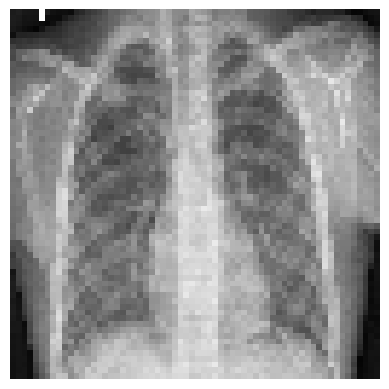

In [13]:
import matplotlib.pyplot as plt

def predict_and_display_image(image_path):
    img = image.load_img(image_path, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    if prediction[0][0] < 0.5:
        print("The image is predicted to be non-infectious to cancer.")
    else:
        print("The image is predicted to be infectious to cancer.")

    plt.imshow(img[0].astype('uint8')) 
    plt.axis('off')  
    plt.show()

image_path_to_check = "E:\\Lung Cancer\\chest_xray\\chest_xray\\test\\NORMAL\\IM-0015-0001.jpeg"

predict_and_display_image(image_path_to_check)


Found 624 images belonging to 2 classes.
20/20 [==============================] - 6s 290ms/step
Confusion Matrix:
[[183  51]
 [  7 383]]


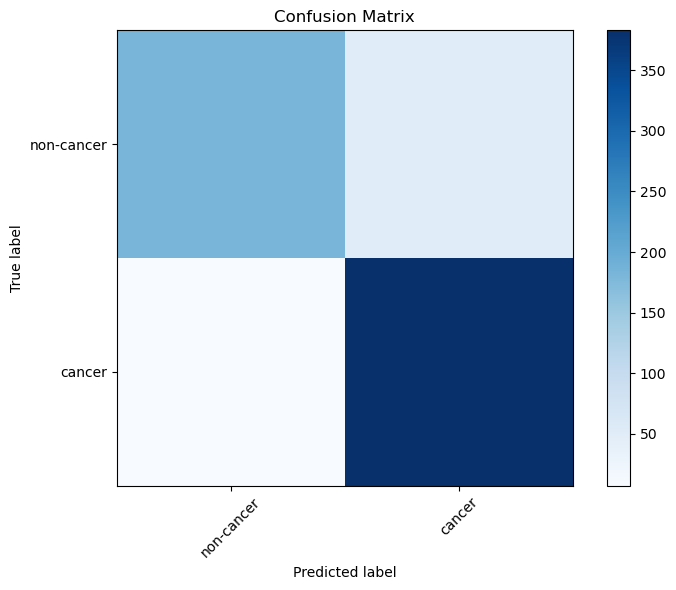

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = load_model("lung_cancer_detection_model.h5")

test_path = "E:\\Lung Cancer\\chest_xray\\test"

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',
    shuffle=False 
)

predictions = model.predict(test_set)
y_pred = np.round(predictions).flatten()
y_true = test_set.classes
labels = ['true negative', 'false positive', 'false negative', 'true positive']
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['non-cancer', 'cancer'], rotation=45)
plt.yticks(tick_marks, ['non-cancer', 'cancer'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

print("Confusion Matrix:")
print(cm)

plt.show()


In [138]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tabulate import tabulate

model = load_model("lung_cancer_detection_model.h5")

test_path = "E:\\Lung Cancer\\chest_xray\\test"

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False 
)

predictions = model.predict(test_set)
y_pred = np.round(predictions).flatten()
y_true = test_set.classes

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

metrics_data = [
    ["Accuracy", accuracy],
    ["Precision", precision],
    ["Recall", recall],
    ["F1-score", f1]
]

print(tabulate(metrics_data, headers=["Metric", "Score"], tablefmt="fancy_grid"))


Found 624 images belonging to 2 classes.
20/20 [==============================] - 6s 275ms/step
╒═══════════╤══════════╕
│ Metric    │    Score │
╞═══════════╪══════════╡
│ Accuracy  │ 0.926282 │
├───────────┼──────────┤
│ Precision │ 0.90566  │
├───────────┼──────────┤
│ Recall    │ 0.984615 │
├───────────┼──────────┤
│ F1-score  │ 0.943489 │
╘═══════════╧══════════╛


In [3]:
import os

train_path = "E:\\Lung Cancer\\chest_xray\\train"
val_path = "E:\\Lung Cancer\\chest_xray\\val"
test_path = "E:\\Lung Cancer\\chest_xray\\test"

def count_items_in_subparts(directory):
    subparts = os.listdir(directory)
    for subpart in subparts:
        subpart_path = os.path.join(directory, subpart)
        if os.path.isdir(subpart_path):
            num_items = len(os.listdir(subpart_path))
            print("Number of items in", subpart, ":", num_items)

print("Train data:")
count_items_in_subparts(train_path)

print("\nValidation data:")
count_items_in_subparts(val_path)

print("\nTest data:")
count_items_in_subparts(test_path)


Train data:
Number of items in NORMAL : 1341
Number of items in PNEUMONIA : 3875

Validation data:
Number of items in NORMAL : 8
Number of items in PNEUMONIA : 8

Test data:
Number of items in NORMAL : 234
Number of items in PNEUMONIA : 390


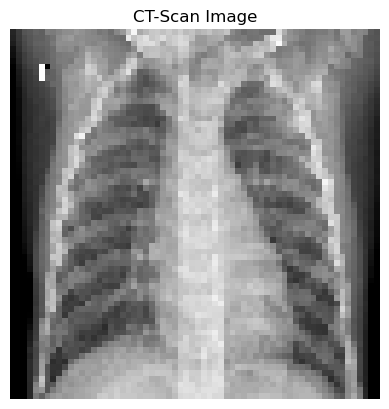

1/1 [==============================] - 0s 50ms/step
The image is predicted to be non-infectious to cancer.


In [54]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

test_path = "E:\\Lung Cancer\\chest_xray\\test"
model = load_model("lung_cancer_detection_model.h5")  

random_class = random.choice(os.listdir(test_path))
random_image_path = os.path.join(test_path, random_class)
random_image_filename = random.choice(os.listdir(random_image_path))
random_image = image.load_img(os.path.join(random_image_path, random_image_filename), target_size=(64, 64))

plt.imshow(random_image)
plt.title('CT-Scan Image')
plt.axis('off')
plt.show()

random_image = image.img_to_array(random_image)
random_image = np.expand_dims(random_image, axis=0)
random_image /= 255. 

prediction = model.predict(random_image)

if prediction[0][0] < 0.5:
    print("The image is predicted to be non-infectious to cancer.")
else:
    print("The image is predicted is infectious to cancer.")


1/1 [==============================] - 0s 78ms/step


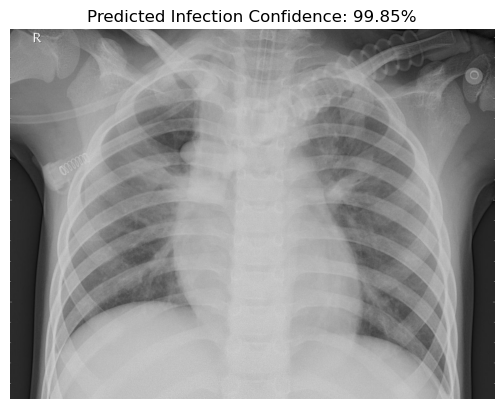

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

model = load_model("lung_cancer_detection_model.h5")

def predict_image_infection(model, image_path):
    
    img = image.load_img(image_path, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0

    prediction = model.predict(img)

    infectious_confidence = prediction[0][0]
    return infectious_confidence

image_path = "E:\\Lung Cancer\\chest_xray\\chest_xray\\test\\PNEUMONIA\\person10_virus_35.jpeg"

confidence = predict_image_infection(model, image_path)
confidence_percentage = confidence * 100


is_non_infectious = confidence < 0.5

img = image.load_img(image_path)
plt.imshow(img)
if is_non_infectious:
    plt.title(f'Predicted Infection Confidence: {confidence_percentage:.2f}% (Non-infectious)')
else:
    plt.title(f'Predicted Infection Confidence: {confidence_percentage:.2f}%')
plt.axis('off')
plt.show()


In [2]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "E:\\Lung Cancer\\chest_xray\\train"
val_path = "E:\\Lung Cancer\\chest_xray\\val"
test_path = "E:\\Lung Cancer\\chest_xray\\test"

image_size = (64, 64)
batch_size = 32

train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = val_image_generator.flow_from_directory(
    val_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.fit(
    train_data_gen,
    steps_per_epoch=len(train_data_gen),
    epochs=10,
    validation_data=val_data_gen,
    validation_steps=len(val_data_gen)
)

cnn_loss, cnn_accuracy = cnn_model.evaluate(test_data_gen, steps=len(test_data_gen))
print("CNN Model Accuracy:", cnn_accuracy)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 69s 414ms/step - loss: 0.2865 - accuracy: 0.8742 - val_loss: 0.5152 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 68s 420ms/step - loss: 0.1278 - accuracy: 0.9519 - val_loss: 0.6270 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 63s 387ms/step - loss: 0.0964 - accuracy: 0.9613 - val_loss: 0.5142 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 63s 386ms/step - loss: 0.0888 - accuracy: 0.9684 - val_loss: 0.2581 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 60s 365ms/step - loss: 0.0679 - accuracy: 0.9762 - val_loss: 0.2473 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 59s 362ms/step - loss: 0.0652 - accuracy: 0.9770 - val_loss: 0.1722 - val_accuracy: 0.9375
Epoch 7

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "E:\\Lung Cancer\\chest_xray\\train"
val_path = "E:\\Lung Cancer\\chest_xray\\val"
test_path = "E:\\Lung Cancer\\chest_xray\\test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

validation_set = test_datagen.flow_from_directory(
    val_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=35,
    validation_data=validation_set,
    validation_steps=len(validation_set)
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

evaluation = model.evaluate(test_set, steps=len(test_set))
print("Test Accuracy:", evaluation[1])



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/35
163/163 [==============================] - 62s 369ms/step - loss: 0.4504 - accuracy: 0.8012 - val_loss: 0.5885 - val_accuracy: 0.6250
Epoch 2/35
163/163 [==============================] - 65s 398ms/step - loss: 0.2130 - accuracy: 0.9147 - val_loss: 1.3913 - val_accuracy: 0.5625
Epoch 3/35
163/163 [==============================] - 62s 376ms/step - loss: 0.1850 - accuracy: 0.9291 - val_loss: 0.9565 - val_accuracy: 0.5625
Epoch 4/35
163/163 [==============================] - 60s 368ms/step - loss: 0.1540 - accuracy: 0.9400 - val_loss: 0.7722 - val_accuracy: 0.6250
Epoch 5/35
163/163 [==============================] - 61s 374ms/step - loss: 0.1521 - accuracy: 0.9419 - val_loss: 0.2775 - val_accuracy: 0.8750
Epoch 6/35
163/163 [==============================] - 58s 359ms/step - loss: 0.1377 - accuracy: 0.9492 - val_loss: 0.6399 - val_accuracy: 0.6250
Epoch 7/35
163/163 [============================

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "E:\\Lung Cancer\\chest_xray\\train"
val_path = "E:\\Lung Cancer\\chest_xray\\val"
test_path = "E:\\Lung Cancer\\chest_xray\\test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(300, 300),  
    batch_size=32,
    class_mode='binary'
)

validation_set = test_datagen.flow_from_directory(
    val_path,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=10,
    validation_data=validation_set,
    validation_steps=len(validation_set)
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

evaluation = model.evaluate(test_set, steps=len(test_set))
print("Test Accuracy:", evaluation[1])


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "E:\\Lung Cancer\\chest_xray\\train"
val_path = "E:\\Lung Cancer\\chest_xray\\val"
test_path = "E:\\Lung Cancer\\chest_xray\\test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

validation_set = test_datagen.flow_from_directory(
    val_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=25,
    validation_data=validation_set,
    validation_steps=len(validation_set)
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

evaluation = model.evaluate(test_set, steps=len(test_set))
print("Test Accuracy:", evaluation[1])


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/25
163/163 [==============================] - 62s 376ms/step - loss: 0.3983 - accuracy: 0.8246 - val_loss: 0.4388 - val_accuracy: 0.8125
Epoch 2/25
163/163 [==============================] - 55s 334ms/step - loss: 0.2628 - accuracy: 0.8896 - val_loss: 0.5010 - val_accuracy: 0.7500
Epoch 3/25
163/163 [==============================] - 57s 350ms/step - loss: 0.2279 - accuracy: 0.9086 - val_loss: 0.3080 - val_accuracy: 0.8750
Epoch 4/25
163/163 [==============================] - 55s 339ms/step - loss: 0.2248 - accuracy: 0.9080 - val_loss: 0.2765 - val_accuracy: 0.8750
Epoch 5/25
163/163 [==============================] - 53s 328ms/step - loss: 0.1938 - accuracy: 0.9243 - val_loss: 0.5748 - val_accuracy: 0.6875
Epoch 6/25
163/163 [==============================] - 54s 333ms/step - loss: 0.1877 - accuracy: 0.9283 - val_loss: 0.3761 - val_accuracy: 0.8125
Epoch 7/25
163/163 [============================